In [30]:
%matplotlib inline

import pprint

import matplotlib.pyplot as plt

import pyhisto
import pyhisto.tools

def plot_1_histo(hist):
    plt.figure(figsize=(20,8))
    plt.step(*hist.xy(), where='mid')
    plt.grid(True)
    plt.show()

In [12]:
! ls -m histos/

101-152Eu_0001, empty


In [13]:
# Choix des fichiers à traiter
RUN_NAME = "101-152Eu_0001"
CHANNEL_NAME = "trapez_3"
FLAVOR = "" # or "_clean"

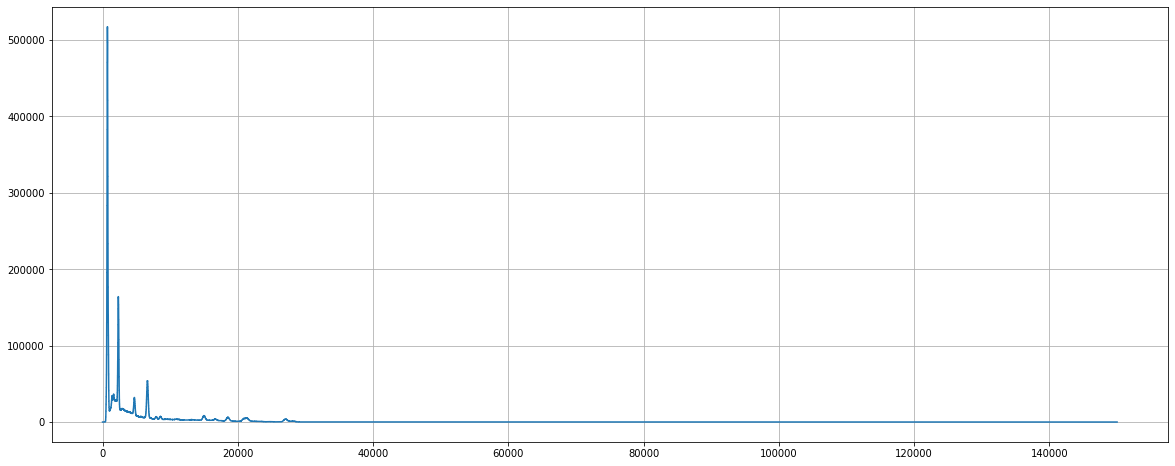

In [18]:
# Chargement du fichier
h = pyhisto.Histogram(fromfile=f"histos/{RUN_NAME}/{CHANNEL_NAME}{FLAVOR}.h1.txt")

plot_1_histo(h)

In [19]:
# Calibration ?
offset = 0
slope = 1.0

h_cal = None

if not slope == 1.0:
    calibrate = lambda x: offset + slope.value * x    
    h_cal = h.copy()
    for b in h_cal:
        b.lowedge = calibrate(b.lowedge)
        b.upedge = calibrate(b.lowedge)
    h = h_cal._frombins(h_cal.bins)
    plot_1_histo(h_cal)

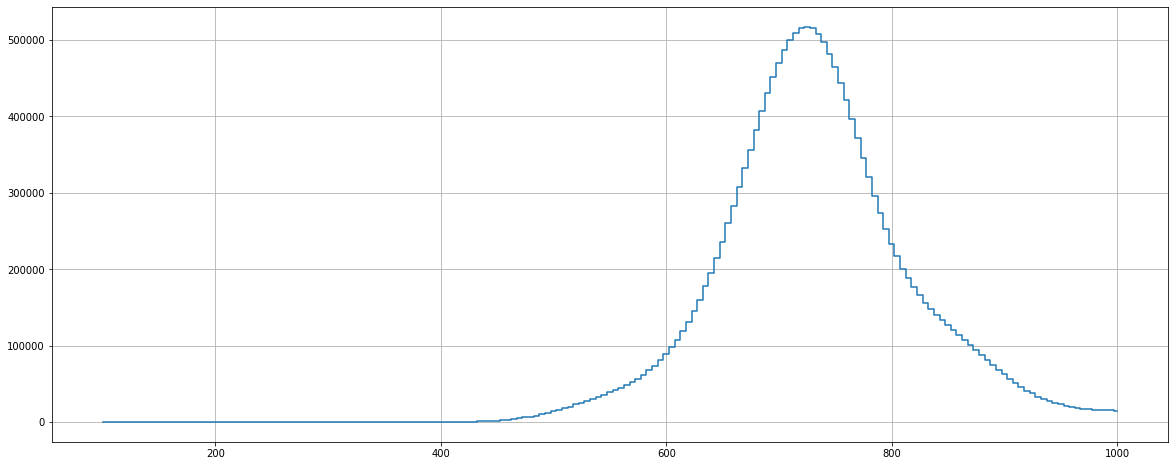

In [24]:
# Zoom

XMIN = 100
XMAX = 1000

h_zoom = h.slice(XMIN, XMAX)
plot_1_histo(h_zoom)

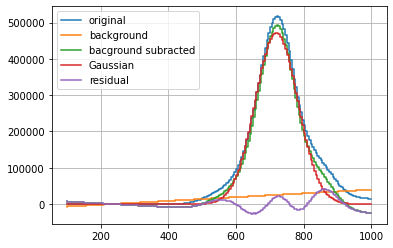

{'integral': 73802896.76323707, 'integral_u': 817982.1777935155, 'mean': 724.6847484892724, 'mean_u': 0.5552288123315501, 'stdev': 62.45062340947416, 'stdev_u': 0.6408229270977378}


In [32]:
# Fit sur le pic 

peak_fit = pyhisto.tools.GaussRealFit(h_zoom)
peak_fit.plot()
pprint.pprint(peak_fit)